In [4]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
def mixt_model(m, S, N, seed):
    
    np.random.seed(seed)
    l = m.shape[0]        # dimension of the space
    c = m.shape[1]        # number of gaussian sub-classes
    Ntotal = np.sum(N)
    X = []
    
    for i in range(0,c):
        Xc = np.random.multivariate_normal(np.array(m[:, i]).T, np.array(S[:, :, i]), N[i]).T
        X.append(Xc)
    X = np.hstack(X)

    return X[:, np.random.permutation(Ntotal)] 


def nn_model(X, Y, n_h, num_iterations, learning_rate, print_cost = False):
    
    
    np.random.seed(3)
    
    ## NN definition
    n_x = X.shape[0]    # size of input layer
    n_h = n_h
    n_y = Y.shape[0]   # size of output layer
    
    
    # parameter initialization
    W1 = np.random.randn(n_h, n_x)*0.1
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.1
    b2 = np.zeros((n_y, 1))
    
    # gradient descent loop
    for i in range(0, num_iterations):
        
        # Forward propagation
        A1 = np.matmul(W1, X) + b1
        Z1 = np.tanh(A1)
        A2 = np.matmul(W2, Z1) + b2
        Z2 = A2
        
        # compute the cost
        m = Y.shape[1]
        cost = np.sum((Y-Z2)**2)/m
        
        # perform back-propagation
        dA2 = Z2 - Y
        dW2 = np.matmul(dA2, Z1.T)/m
        db2 = np.sum(dA2, axis = 1, keepdims = True)/m
        dA1 = np.multiply(np.matmul(W2.T, dA2), (1-np.power(Z1, 2)))
        dW1 = np.matmul(dA1, X.T)/m
        db1 = np.sum(dA1, axis = 1, keepdims = True)/m
        
        # Parameter update
        W1 = W1-learning_rate*dW1
        b1 = b1-learning_rate*db1
        W2 = W2-learning_rate*dW2
        b2 = b2-learning_rate*db2          
        
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
        
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters

def nn_predict(parameters, X):
    
    """ 
    Returns:
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # unpack the parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Forward propagation
    A1 = np.matmul(W1,X)  + b1
    Z1 = np.tanh(A1)
    A2 = np.matmul(W2,Z1) + b2
    Z2 = A2      #  output latyer's transfer function
    
    predictions = np.round(Z2)
    
    return predictions


def plot_decision_boundary(model, X, y):
    
    # set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    
    # generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # predict the function value of the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap = plt.cm.Spectral)
    plt.ylabel("x2")
    plt.xlabel("x1")
    plt.scatter(X[0, :], X[1, :], c = y, cmap = plt.cm.Spectral)

# Part 1

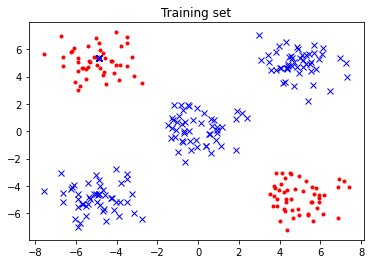

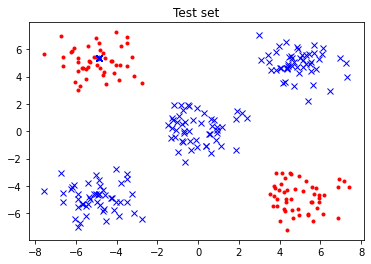

In [6]:
l = 2  # Dimensionality
m1 = np.array([[-5, 5], [5, -5]]).T  
m2 = np.array([[-5, -5], [0, 0], [5, 5]]).T
[l,c1] = m1.shape  # no of gaussians per class
[l,c2] = m2.shape
s=1

# Generate the training data from the first class
Num_pts1 = np.array([50,50])  #50 data points for each guassian, 100 in total
S1 = np.zeros(shape=(l, l, c1))

for i in range(0, c1):
    S1[:, :, i] = np.array(s*np.eye(l))
seed = 0  # Random generator seed
w1 = mixt_model(m1, S1, Num_pts1, seed)

# Generate the training data from the second class
Num_pts2 = np.array([50,50,50])  # 150; # Number of second class data points
S2 = np.zeros(shape=(l, l, c2))
for i in range(0, c2):
    S2[:, :, i] = s * np.eye(l)
seed=0
w2= mixt_model(m2, S2, Num_pts2, seed)

# form a training set
X1= np.concatenate((w1,  w2), axis=1)  # Data vectors
y1=np.concatenate((np.ones(shape=(1, 100)), np.zeros(shape=(1, 150))), axis=1)

plt.plot(X1[0, np.where(y1 == 1)], X1[1, np.where(y1 == 1)], 'r.',
         X1[0, np.where(y1 == 0)], X1[1, np.where(y1 == 0)], 'bx')
plt.title('Training set')
plt.show()

## develop a  test set 
np.random.seed() # Random generator seed
t1 = mixt_model(m1, S1, Num_pts1, seed)

np.random.seed()
t2= mixt_model(m2, S2, Num_pts2, seed)

X2= np.concatenate((t1,  t2), axis=1)  # Data vectors
y2=np.concatenate((np.ones(shape=(1, 100)), np.zeros(shape=(1, 150))), axis=1)

plt.plot(X2[0, np.where(y2 == 1)], X2[1, np.where(y2 == 1)], 'r.',
         X2[0, np.where(y2 == 0)], X2[1, np.where(y2 == 0)], 'bx')
plt.title('Test set')
plt.show()

# Part 2

Cost after iteration 0: 0.400005
Cost after iteration 1000: 0.239998
Cost after iteration 2000: 0.239998
Cost after iteration 3000: 0.239997
Cost after iteration 4000: 0.239997
Cost after iteration 5000: 0.239997
Cost after iteration 6000: 0.239997
Cost after iteration 7000: 0.239997
Cost after iteration 8000: 0.239997
train error: 40.0 % nodes: 1 learning rate: 0.01
test error: 40.0 % nodes: 1 learning rate: 0.01


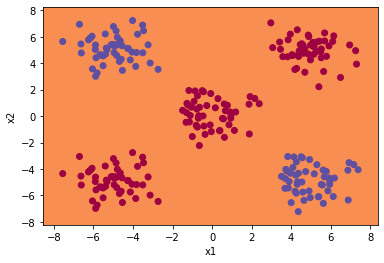

Cost after iteration 0: 0.400471
Cost after iteration 1000: 0.239999
Cost after iteration 2000: 0.239998
Cost after iteration 3000: 0.239998
Cost after iteration 4000: 0.239998
Cost after iteration 5000: 0.239998
Cost after iteration 6000: 0.239998
Cost after iteration 7000: 0.239998
Cost after iteration 8000: 0.239997
train error: 40.0 % nodes: 2 learning rate: 0.01
test error: 40.0 % nodes: 2 learning rate: 0.01


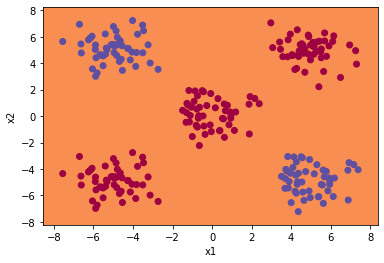

Cost after iteration 0: 0.400402
Cost after iteration 1000: 0.238620
Cost after iteration 2000: 0.222326
Cost after iteration 3000: 0.162465
Cost after iteration 4000: 0.134850
Cost after iteration 5000: 0.118329
Cost after iteration 6000: 0.078199
Cost after iteration 7000: 0.030230
Cost after iteration 8000: 0.010698
train error: 0.0 % nodes: 4 learning rate: 0.01
test error: 0.0 % nodes: 4 learning rate: 0.01


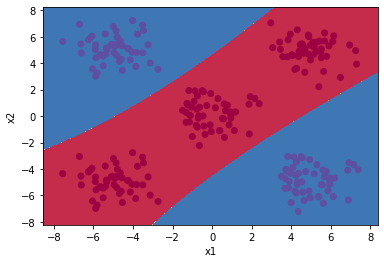

Cost after iteration 0: 0.438804
Cost after iteration 1000: 0.223416
Cost after iteration 2000: 0.121149
Cost after iteration 3000: 0.041678
Cost after iteration 4000: 0.020972
Cost after iteration 5000: 0.010248
Cost after iteration 6000: 0.007041
Cost after iteration 7000: 0.006335
Cost after iteration 8000: 0.006129
train error: 0.0 % nodes: 8 learning rate: 0.01
test error: 0.0 % nodes: 8 learning rate: 0.01


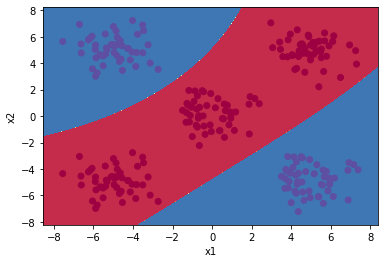

In [7]:
X = X1
Y = y1
nodes = np.array([1,2,4,8])
learning_rate = np.array([0.01])
for i in range (len(learning_rate)):
    for j in range (len(nodes)):
        parameters = nn_model(X, Y, nodes[j], num_iterations = 9000, learning_rate=learning_rate[i], print_cost = True)
        parameters

        Y_predict_train = nn_predict(parameters, X)
        Y_predict_test = nn_predict(parameters, X2)

        # Print train/test Errors
        print("train error: {} % ".format(np.mean(np.abs(Y_predict_train - Y)) * 100) + "nodes: {} ".format(nodes[j]) + "learning rate: {}".format(learning_rate[i]))
        print("test error: {} % ".format(np.mean(np.abs(Y_predict_test - y2)) * 100) + "nodes: {} ".format(nodes[j]) + "learning rate: {}".format(learning_rate[i]))
        plot_decision_boundary(lambda x: nn_predict(parameters, x.T), X, Y.ravel())
        plt.show()

# Part 3 & 4

Cost after iteration 0: 0.400005
Cost after iteration 1000: 0.371002
Cost after iteration 2000: 0.347255
Cost after iteration 3000: 0.327814
Cost after iteration 4000: 0.311897
Cost after iteration 5000: 0.298865
Cost after iteration 6000: 0.288196
Cost after iteration 7000: 0.279460
Cost after iteration 8000: 0.272308
train error: 40.0 % nodes: 1 learning rate: 0.0001
test error: 40.0 % nodes: 1 learning rate: 0.0001


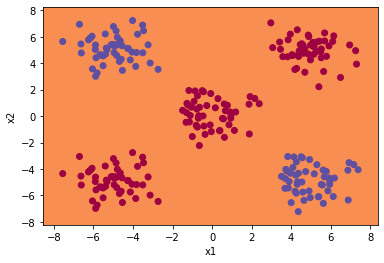

Cost after iteration 0: 0.400471
Cost after iteration 1000: 0.371474
Cost after iteration 2000: 0.347731
Cost after iteration 3000: 0.328289
Cost after iteration 4000: 0.312368
Cost after iteration 5000: 0.299329
Cost after iteration 6000: 0.288650
Cost after iteration 7000: 0.279902
Cost after iteration 8000: 0.272736
train error: 40.0 % nodes: 2 learning rate: 0.0001
test error: 40.0 % nodes: 2 learning rate: 0.0001


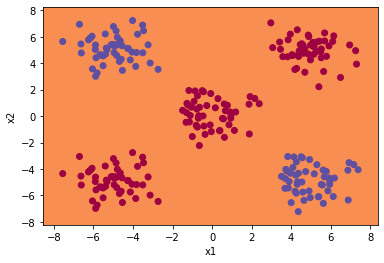

Cost after iteration 0: 0.400402
Cost after iteration 1000: 0.370766
Cost after iteration 2000: 0.346606
Cost after iteration 3000: 0.326906
Cost after iteration 4000: 0.310844
Cost after iteration 5000: 0.297746
Cost after iteration 6000: 0.287066
Cost after iteration 7000: 0.278357
Cost after iteration 8000: 0.271256
train error: 40.0 % nodes: 4 learning rate: 0.0001
test error: 40.0 % nodes: 4 learning rate: 0.0001


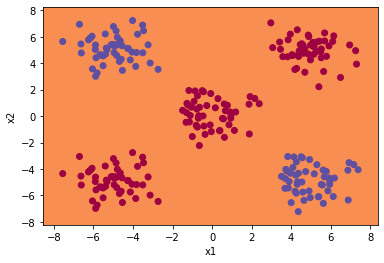

Cost after iteration 0: 0.438804
Cost after iteration 1000: 0.396642
Cost after iteration 2000: 0.364107
Cost after iteration 3000: 0.338698
Cost after iteration 4000: 0.318687
Cost after iteration 5000: 0.302830
Cost after iteration 6000: 0.290209
Cost after iteration 7000: 0.280128
Cost after iteration 8000: 0.272055
train error: 40.0 % nodes: 8 learning rate: 0.0001
test error: 40.0 % nodes: 8 learning rate: 0.0001


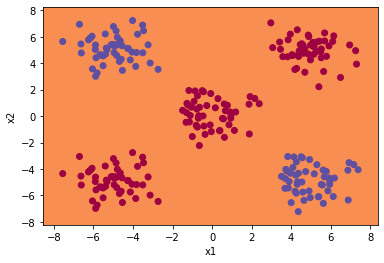

In [8]:
X = X1
Y = y1
nodes = np.array([1,2,4,8])
learning_rate = np.array([0.0001])
for i in range (len(learning_rate)):
    for j in range (len(nodes)):
        parameters = nn_model(X, Y, nodes[j], num_iterations = 9000, learning_rate=learning_rate[i], print_cost = True)
        parameters

        Y_predict_train = nn_predict(parameters, X)
        Y_predict_test = nn_predict(parameters, X2)

        # Print train/test Errors
        print("train error: {} % ".format(np.mean(np.abs(Y_predict_train - Y)) * 100) + "nodes: {} ".format(nodes[j]) + "learning rate: {}".format(learning_rate[i]))
        print("test error: {} % ".format(np.mean(np.abs(Y_predict_test - y2)) * 100) + "nodes: {} ".format(nodes[j]) + "learning rate: {}".format(learning_rate[i]))
        plot_decision_boundary(lambda x: nn_predict(parameters, x.T), X, Y.ravel())
        plt.show()

# Part 5

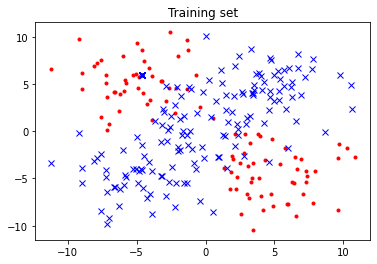

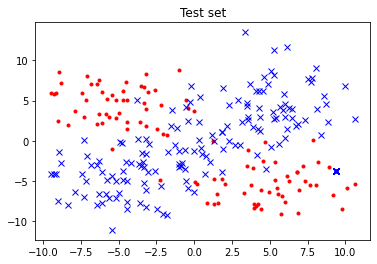

Cost after iteration 0: 0.399945
Cost after iteration 1000: 0.239985
Cost after iteration 2000: 0.239982
Cost after iteration 3000: 0.239981
Cost after iteration 4000: 0.239980
Cost after iteration 5000: 0.239979
Cost after iteration 6000: 0.239977
Cost after iteration 7000: 0.239975
Cost after iteration 8000: 0.239973
train error: 40.0 % nodes: 2 learning rate: 0.01
test error: 40.0 % nodes: 2 learning rate: 0.01


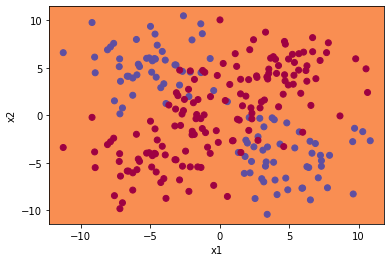

Cost after iteration 0: 0.451817
Cost after iteration 1000: 0.208065
Cost after iteration 2000: 0.162987
Cost after iteration 3000: 0.120122
Cost after iteration 4000: 0.091455
Cost after iteration 5000: 0.078895
Cost after iteration 6000: 0.070794
Cost after iteration 7000: 0.067216
Cost after iteration 8000: 0.065752
train error: 8.0 % nodes: 20 learning rate: 0.01
test error: 8.0 % nodes: 20 learning rate: 0.01


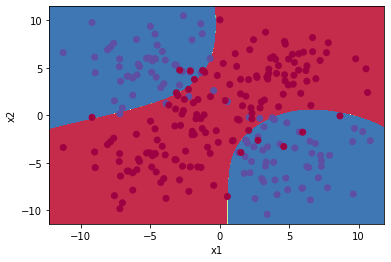

Cost after iteration 0: 0.587655
Cost after iteration 1000: 0.211640
Cost after iteration 2000: 0.121861
Cost after iteration 3000: 0.081851
Cost after iteration 4000: 0.075843
Cost after iteration 5000: 0.071503
Cost after iteration 6000: 0.068849
Cost after iteration 7000: 0.067029
Cost after iteration 8000: 0.065562
train error: 7.199999999999999 % nodes: 50 learning rate: 0.01
test error: 8.0 % nodes: 50 learning rate: 0.01


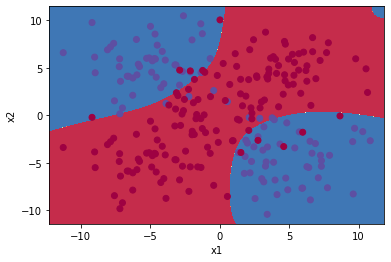

In [9]:
# part v
l = 2  # Dimensionality
m1 = np.array([[-5, 5], [5, -5]]).T  # centroids
m2 = np.array([[-5, -5], [0, 0], [5, 5]]).T
[l,c1] = m1.shape  # no of gaussians per class
[l,c2] = m2.shape
s=6
# Generate the training data from the first class
Num_pts1 = np.array([50,50])  #50 data points for each guassian, 100 in total
S1 = np.zeros(shape=(l, l, c1))

for i in range(0, c1):
    S1[:, :, i] = np.array(s*np.eye(l))
seed = 0  # Random generator seed
w1 = mixt_model(m1, S1, Num_pts1, seed)



# Generate the training data from the second class
Num_pts2 = np.array([50,50,50])  # 150; # Number of second class data points
S2 = np.zeros(shape=(l, l, c2))
for i in range(0, c2):
    S2[:, :, i] = s * np.eye(l)
seed=0
w2= mixt_model(m2, S2, Num_pts2, seed)



# form a training set

X1= np.concatenate((w1,  w2), axis=1)  # Data vectors
y1=np.concatenate((np.ones(shape=(1, 100)), np.zeros(shape=(1, 150))), axis=1)

plt.plot(X1[0, np.where(y1 == 1)], X1[1, np.where(y1 == 1)], 'r.',
         X1[0, np.where(y1 == 0)], X1[1, np.where(y1 == 0)], 'bx')
plt.title('Training set')
plt.show()



## develop a  test set 

seed = 100  # Random generator seed
t1 = mixt_model(m1, S1, Num_pts1, seed)

seed=100
t2= mixt_model(m2, S2, Num_pts2, seed)

X2= np.concatenate((t1,  t2), axis=1)  # Data vectors
y2=np.concatenate((np.ones(shape=(1, 100)), np.zeros(shape=(1, 150))), axis=1)

plt.plot(X2[0, np.where(y2 == 1)], X2[1, np.where(y2 == 1)], 'r.',
         X2[0, np.where(y2 == 0)], X2[1, np.where(y2 == 0)], 'bx')
plt.title('Test set')
plt.show()


X = X1
Y = y1
nodes = np.array([2,20,50])
learning_rate = np.array([0.01])
for i in range (len(learning_rate)):
    for j in range (len(nodes)):
        parameters = nn_model(X, Y, nodes[j], num_iterations = 9000, learning_rate=learning_rate[i], print_cost = True)
        parameters

        Y_predict_train = nn_predict(parameters, X)
        Y_predict_test = nn_predict(parameters, X2)

        # Print train/test Errors
        print("train error: {} % ".format(np.mean(np.abs(Y_predict_train - Y)) * 100) + "nodes: {} ".format(nodes[j]) + "learning rate: {}".format(learning_rate[i]))
        print("test error: {} % ".format(np.mean(np.abs(Y_predict_test - y2)) * 100) + "nodes: {} ".format(nodes[j]) + "learning rate: {}".format(learning_rate[i]))
        plot_decision_boundary(lambda x: nn_predict(parameters, x.T), X, Y.ravel())
        plt.show()

# Comments:

***1. Increasing the number of nodes helps in classifying the data points, although the computations are increased. At nodes 1 and 2 (for any given learning rate), the algorithm is not able to classify both classes, instead it just classifies everything as class 2 (60% points) that's why the error is 40% because class 1 points are also classified as class 2 points.***

***2. Learning rate affects the classification as well, if its too low then cost function is not minimized hence the error is too high to classify the points. at 0.001 learning rate no points are classified, at learning rate = 0.01 with higher number of nodes, the data points are classified efficiently.***

